## 문제
```
    mpg 데이터와 midwest 데이터를 이용해 분석 문제 해결
```

### Q1. `mpg` 데이터의 `cty`(도시 연비)와 `hwy`(고속도로 연비) 간에 어떤 관계가 있는지 알아보려고 함. `x`축은 `cty`, `y`축은 `hwy`로 된 산점도 만들기

<Axes: xlabel='cty', ylabel='hwy'>

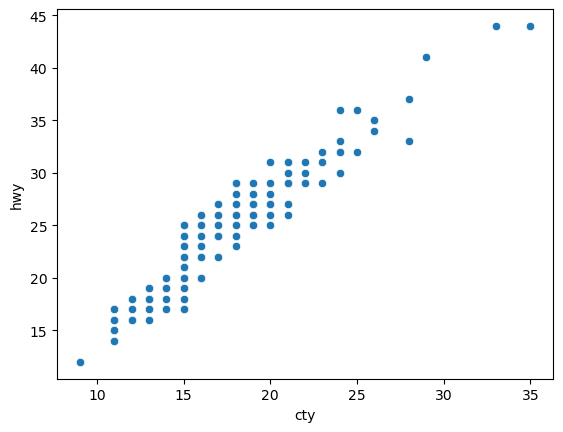

In [11]:
import pandas as pd
import seaborn as sns

# mpg 데이터 불러오기
mpg = pd.read_csv('./input/mpg.csv')

# 산점도 만들기
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

### Q2. 미국의 지역별 인구통계 정보를 담은 `midwest.csv`를 이용해 전체 인구와 아시아인 인구간에 어떤 관계가 있는지 알아보려 함. 
- `x`축은 `poptotal`(전체 인구), `y`축은 `popasian`(아시안 인구)로 된 산점도 만들기

- 전체 인구는 50만 명 이하, 아시아인 인구는 1만 명 이하인 지역만 산점도에 표시되게 설정

[(0.0, 500000.0), (0.0, 10000.0)]

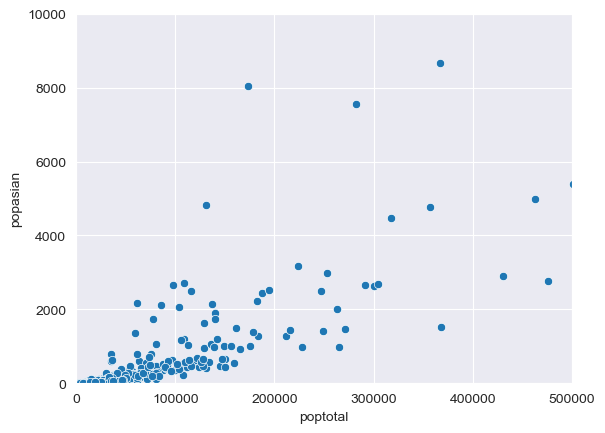

In [3]:
# midwest 데이터 불러오기
midwest = pd.read_csv('./input/midwest.csv')

# 산점도 만들기, 축 범위 제한하기
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian')\
    .set(xlim = (0, 500000), ylim = (0, 10000))

## 막대 그래프 - 집단 간의 차이 표현하기

### 평균 막대 그래프 만들기 - drv(구동방식)별 hwy(고속도로 연비) 평균

In [5]:
# 1. 집단별 평균표 만들기
# drv별 분리 -> hwy 평균 구하기
df_mpg = mpg.groupby('drv')\
    .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [6]:
df_mpg = mpg.groupby('drv', as_index = False)\
    .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

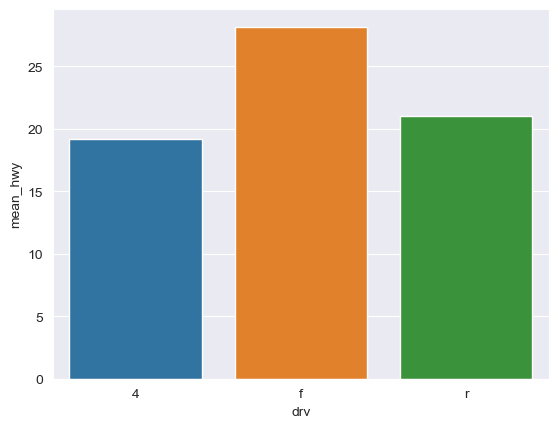

In [8]:
# 2. 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv')

In [10]:
# 3. 크기순으로 정렬하기
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)
df_mpg

,drv,mean_hwy
1,f,28.160377
2,r,21.000000
0,4,19.174757


<Axes: xlabel='drv', ylabel='mean_hwy'>

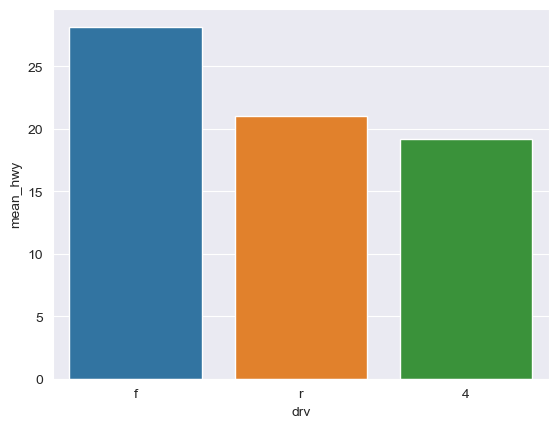

In [11]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv')

### 빈도 막대 그래프 만들기 - drv별 빈도

In [13]:
# 1. 집단별 빈도표 만들기
# 구동 방식별 빈도
df_mpg = mpg.groupby('drv', as_index = False)\
    .agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

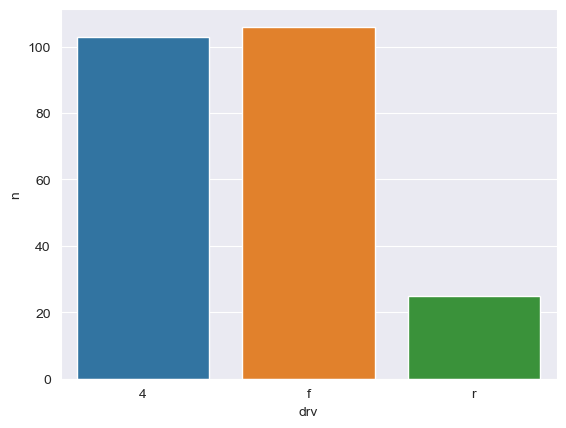

In [14]:
# 2. 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'n', hue = 'drv')

<Axes: xlabel='drv', ylabel='count'>

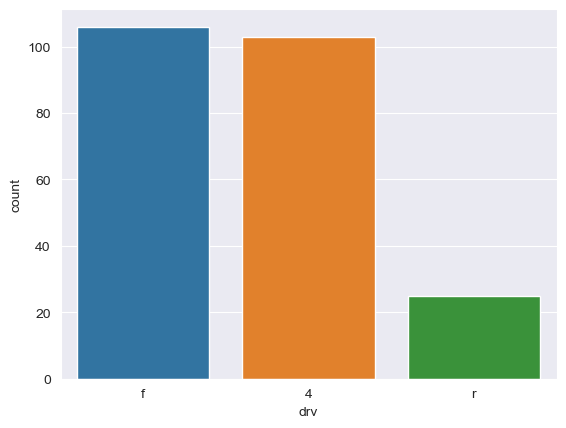

In [16]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv', hue = 'drv')

In [17]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [18]:
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

<Axes: xlabel='drv', ylabel='count'>

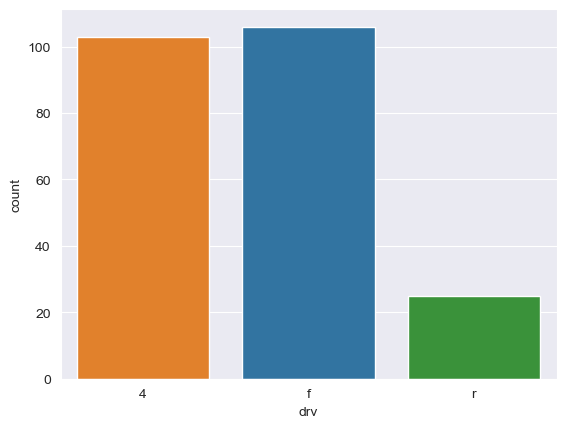

In [20]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', hue = 'drv', order = ['4', 'f', 'r'])

## 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

### 시계열 그래프 만들기

In [21]:
economics = pd.read_csv('./input/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

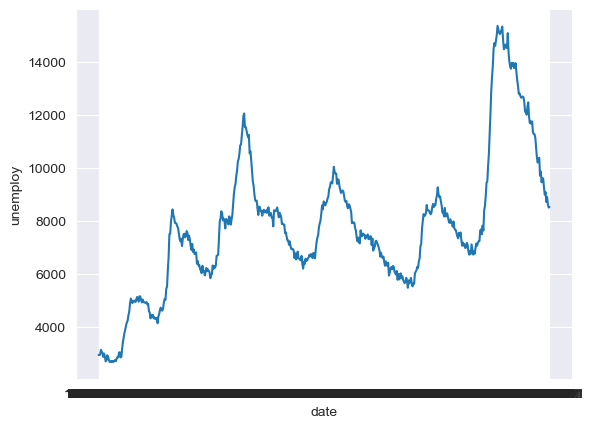

In [22]:
# 선 그래프 만들기 - x축 시간(date), y축 실업자 수(unemploy)
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [23]:
# 1. 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인 - info()
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [24]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [25]:
# 연 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [29]:
# 월 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [31]:
# 일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [32]:
# 2. 연도 변수 만들기
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

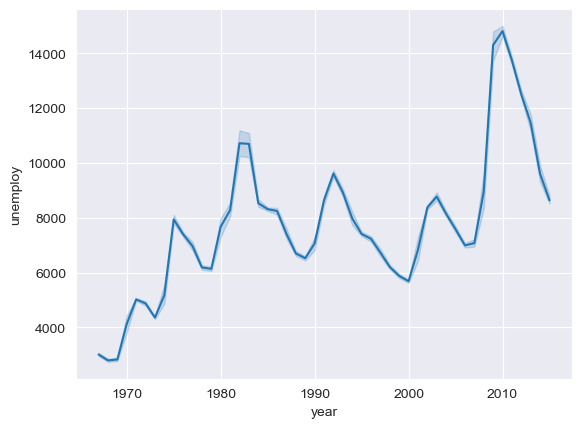

In [33]:
# 3. x축에 연도 표시하기
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

## 문제
```
    economics 데이터를 이용해 분석 문제 해결
```

### Q1. psavert(개인 저축률)가 시간에 따라 어떻게 변해왔는지 알아보려고 할 때, 연도별 개인 저축률의 변화를 나타낸 시계열 그래프 만들기

In [7]:
import pandas as pd

# economics  데이터 불러오기
economics = pd.read_csv('./input/economics.csv')

economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.000,12.6,4.5,2944
1,1967-08-01,509.8,198911.000,12.6,4.7,2945
2,1967-09-01,515.6,199113.000,11.9,4.6,2958
3,1967-10-01,512.2,199311.000,12.9,4.9,3143
4,1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504


In [8]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])
economics

,date,pce,pop,psavert,uempmed,unemploy,date2
0,1967-07-01,506.7,198712.000,12.6,4.5,2944,1967-07-01
1,1967-08-01,509.8,198911.000,12.6,4.7,2945,1967-08-01
2,1967-09-01,515.6,199113.000,11.9,4.6,2958,1967-09-01
3,1967-10-01,512.2,199311.000,12.9,4.9,3143,1967-10-01
4,1967-11-01,517.4,199498.000,12.8,4.7,3066,1967-11-01
...,...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717,2014-12-01
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903,2015-01-01
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610,2015-02-01
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504,2015-03-01


In [9]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.000,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.000,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.000,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.000,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.000,12.8,4.7,3066,1967-11-01,1967
...,...,...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717,2014-12-01,2014
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903,2015-01-01,2015
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610,2015-02-01,2015
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504,2015-03-01,2015


### Q2. 2014년 월별 psavert의 변화를 나타낸 시계열 그래프 만들기

<Axes: xlabel='year', ylabel='psavert'>

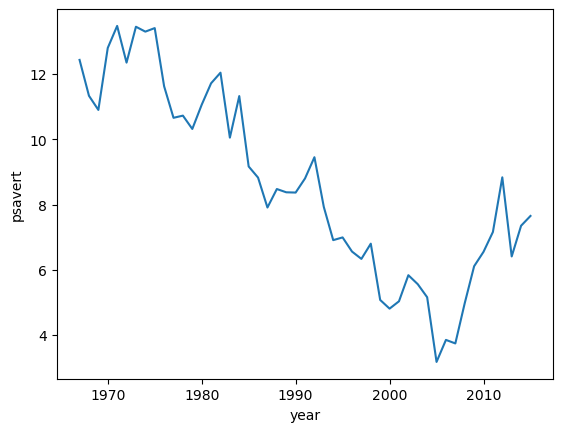

In [12]:
# 연도별 개인 저축률 선 그래프
sns.lineplot(data = economics, x = 'year', y = 'psavert', errorbar = None)

## 상자 그림 - 집단 간 분포 차이 표현하기

### 상자 그림 만들기

<Axes: xlabel='drv', ylabel='hwy'>

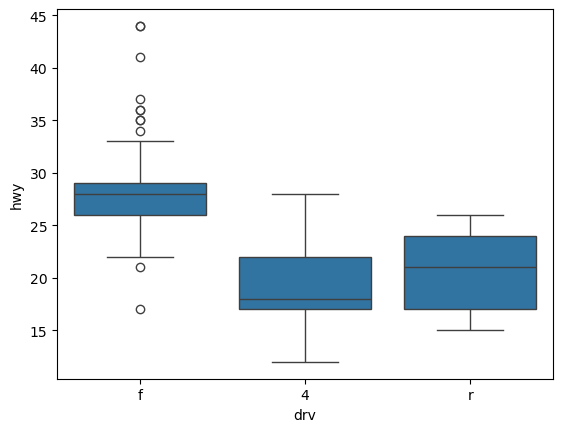

In [13]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

## 문제
```
    mpg 데이터를 이용해 분석 문제 해결하기
```

### Q1. category(자동차 종류)가 'compact', 'subcompact', 'suv' 인 자동차의 cty(도시 연비)가 어떻게 다른지 비교할 때, 세 차종의 cty를 나타낸 상자그림 만들기

In [14]:
# mpg 데이터 불러오기
mpg = pd.read_csv('./input/mpg.csv')

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [15]:
# compact, subcompact, suv 차종 추출
df = mpg.query('category in ["compact", "subcompact", "suv"]')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
223,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact


<Axes: xlabel='category', ylabel='cty'>

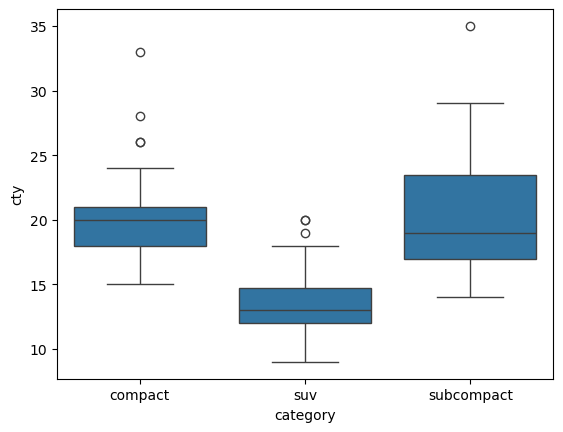

In [17]:
# 상자 그림 만들기
sns.boxplot(data = df, x = 'category', y = 'cty')